## Importing the required  libraries

In [35]:
import os
from os import listdir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import tensorflow as tf
import missingno as msno
import math
%matplotlib inline

## Loading the data

In [36]:
sepsis_data = pd.read_csv('sepsis_data.psv', sep ='|')

## Estimatory Data Analysis

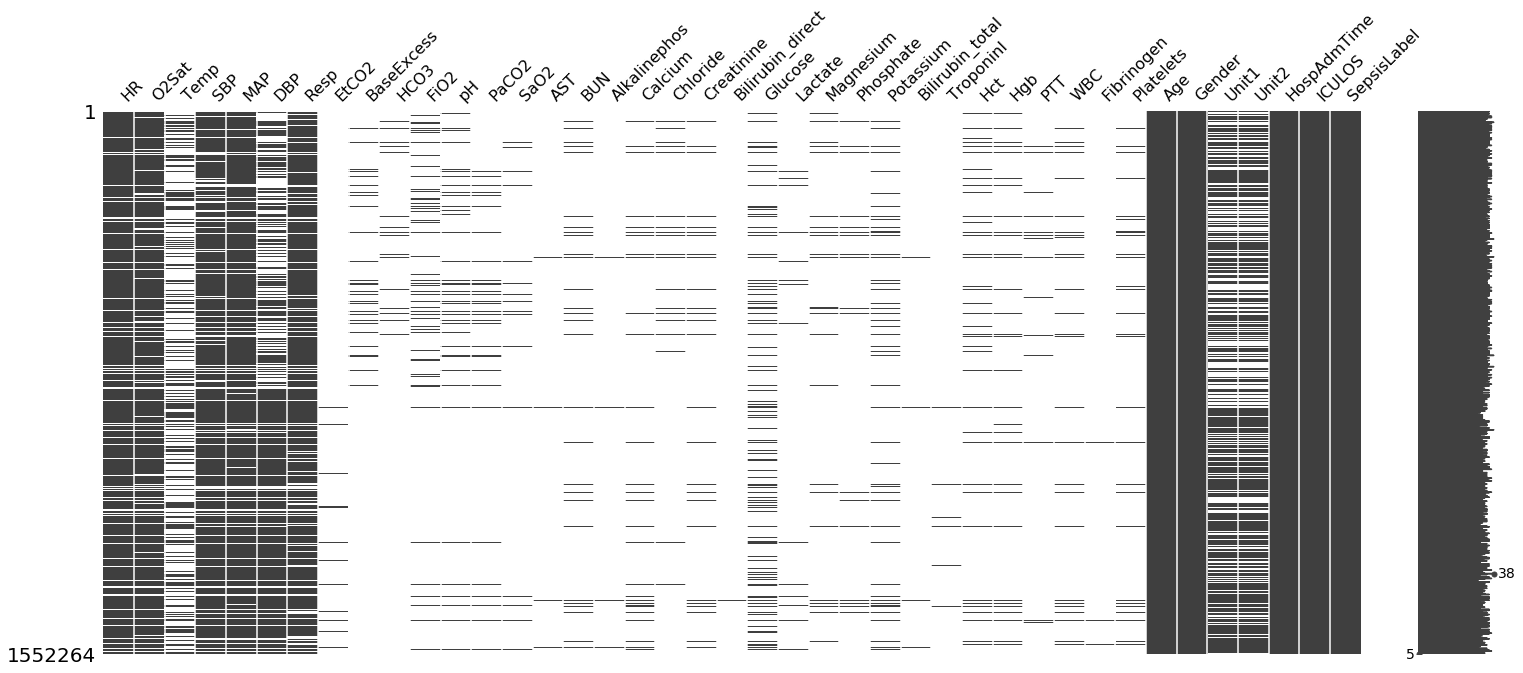

In [37]:
# A matrix indicating the no.of missing values in each column (dark - available, white-missing)
msno.matrix(sepsis_data)

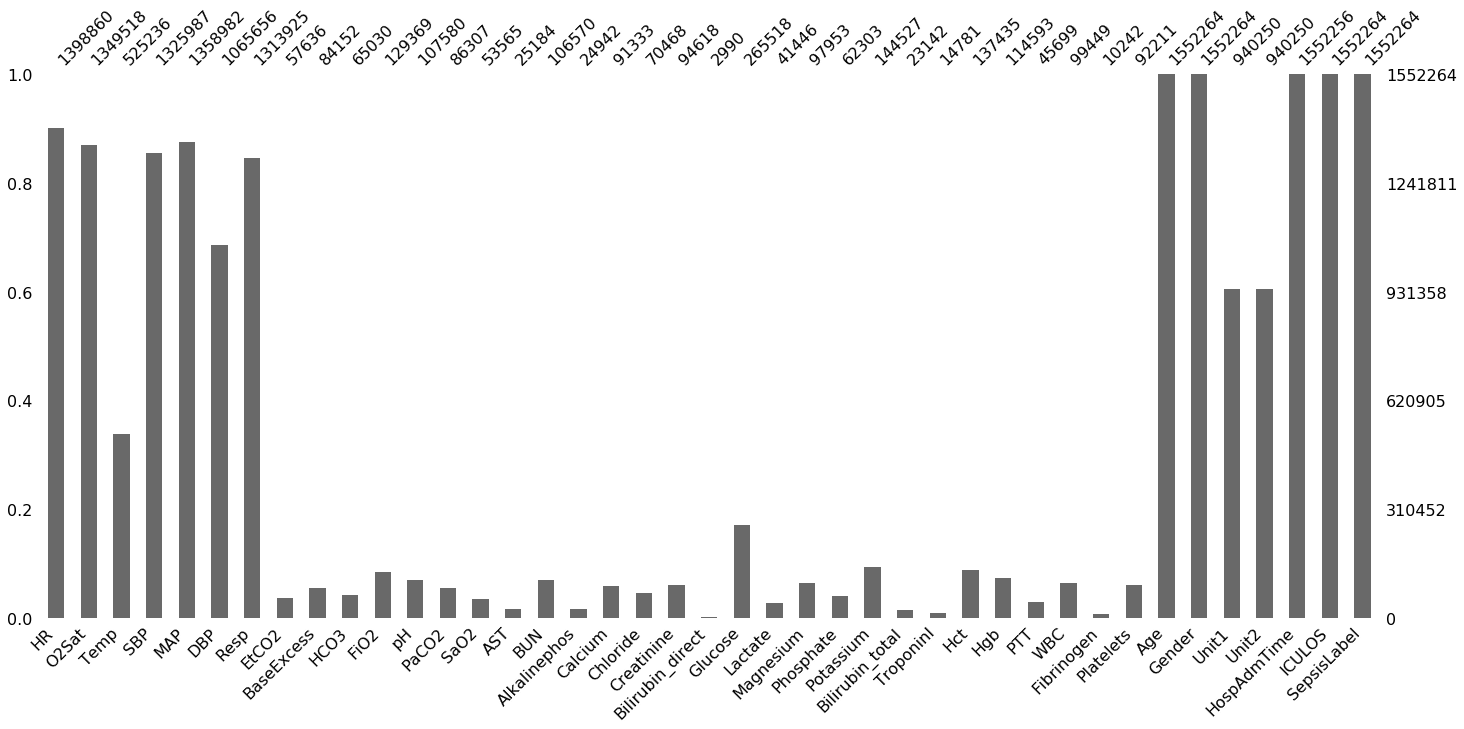

In [38]:
# A bar graph indicating the no.of missing values in each column
msno.bar(sepsis_data)

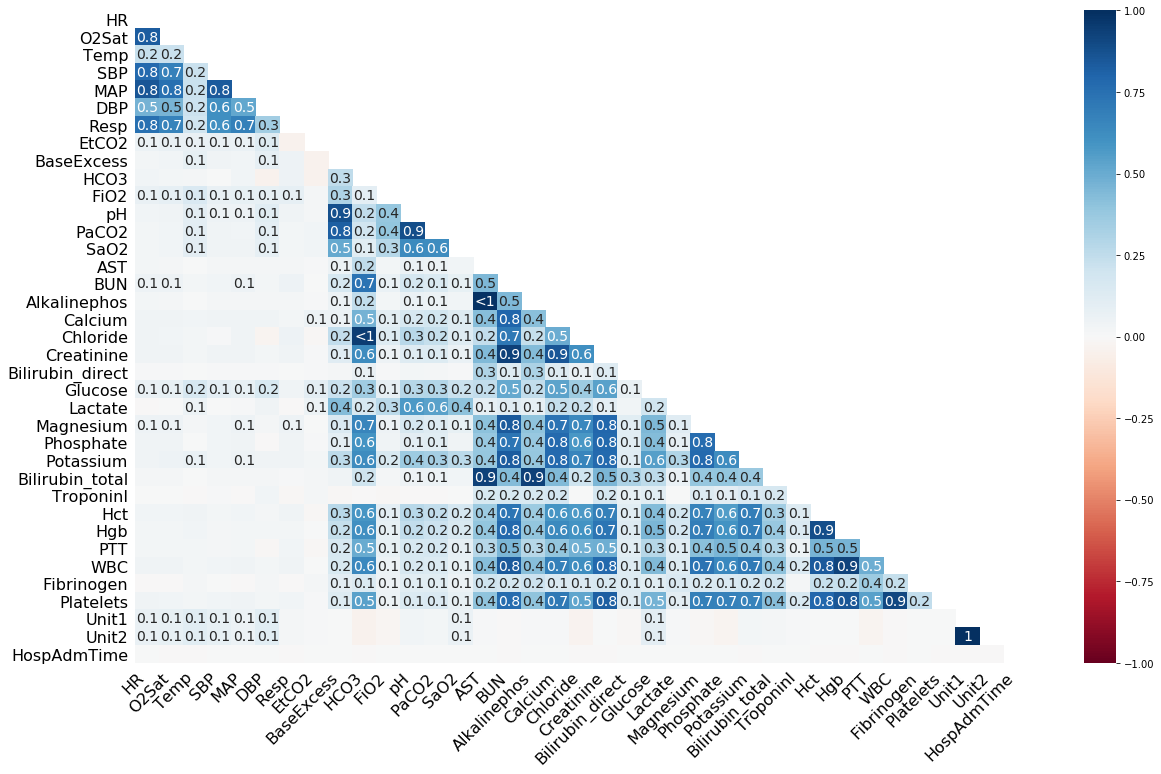

In [39]:
# A heatmap to show the correlation between the various features
msno.heatmap(sepsis_data)

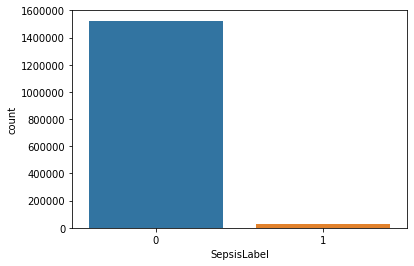

In [40]:
#No.of sepsis and non-sepsis patients
sns.countplot(x='SepsisLabel',data=sepsis_data)

## Loading the cleaned data

In [57]:
sepsis_cleaned_data = pd.read_csv('sepsis_cleaned_data_final.csv')
sepsis_clean = sepsis_cleaned_data.to_numpy()
X = sepsis_clean.reshape((40336,40,10))

In [72]:
sepsis_labels_data = pd.read_csv('sepsis_cleaned_data_final_labels.csv')
sepsis_labels = sepsis_labels_data.to_numpy()
y = sepsis_labels.reshape(40336)

In [73]:
X, y = np.array(X) , np.array(y)

In [74]:
print(X.shape)
print(y.shape)

(40336, 40, 10)
(40336,)


## Split the dataset into training and test sets

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

##  Loading the pre-trained model to make predictions

In [76]:
loaded_model = tf.keras.models.load_model('model.h5')

In [77]:
y_pred = loaded_model.predict(X_test)

In [78]:
# converting the continuous values which are outputs from the sigmoid function into discrete values - 0 or 1
from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    print(k)
    dist[k] /= len(X)

acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1

final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)

0
1
{0: 0.17729020975190177}
[0 0 0 ... 0 1 0]


## Confusion Matrix and Classification Report to evaluate the model

In [80]:
# generating the confusion matrix and the classfication report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, final_pred))
print (classification_report(y_test,final_pred))

[[9023  297]
 [ 328  436]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9320
           1       0.59      0.57      0.58       764

    accuracy                           0.94     10084
   macro avg       0.78      0.77      0.77     10084
weighted avg       0.94      0.94      0.94     10084

